# Walmart Case Study

Problem Statement
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (precisely, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'C:\Users\hp\Desktop\CaseStudies\Walmart\walmart_data.csv')

## Dataset

The company collected the transactional data of customers who purchased products from ehWalmart Store during Black Friday.
d. The dataset has the followi features :

-  User_ID: User ID
  
-  Product_ID: Product ID

-  Gender: Sex of User

-  Age: Age in bins

-  Occupation: Occupation(Masked)

-  City_Category: Category of the city (A,B,C)

-  StayInCurrentCityYears:	Number of years stay in current city

-  Marital_Status:	Marital Status

-  ProductCategory:	Product Category (Masked)

-  Purchase:	Purchase Amount
Amountnt

## Data Audit

In [5]:
df.head

<bound method NDFrame.head of        User_ID Product_ID Gender    Age  Occupation City_Category  \
0      1000001  P00069042      F   0-17        10.0             A   
1      1000001  P00248942      F   0-17        10.0             A   
2      1000001  P00087842      F   0-17        10.0             A   
3      1000001  P00085442      F   0-17        10.0             A   
4      1000002  P00285442      M    55+        16.0             C   
...        ...        ...    ...    ...         ...           ...   
25032  1003843  P00034642      F   0-17        10.0             B   
25033  1003844  P00359942      M  18-25         4.0             C   
25034  1003844  P00193842      M  18-25         4.0             C   
25035  1003845  P00110942      M  26-35        12.0             C   
25036  1003845      P0022    NaN    NaN         NaN           NaN   

      Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                              2             0.0              

In [6]:
df.shape

(25037, 10)

In [7]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                    float64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                float64
Product_Category              float64
Purchase                      float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25037 entries, 0 to 25036
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     25037 non-null  int64  
 1   Product_ID                  25037 non-null  object 
 2   Gender                      25036 non-null  object 
 3   Age                         25036 non-null  object 
 4   Occupation                  25036 non-null  float64
 5   City_Category               25036 non-null  object 
 6   Stay_In_Current_City_Years  25036 non-null  object 
 7   Marital_Status              25036 non-null  float64
 8   Product_Category            25036 non-null  float64
 9   Purchase                    25036 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.9+ MB


In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,2.503700e+04,25036.000000,25036.000000,25036.000000,25036.000000
mean,1.001944e+06,8.254593,0.399545,5.302604,9240.939647
std,1.124044e+03,6.533908,0.489815,3.705730,4937.285195
min,1.000001e+06,0.000000,0.000000,1.000000,186.000000
25%,1.001015e+06,3.000000,0.000000,1.000000,5837.750000
50%,1.001884e+06,7.000000,0.000000,5.000000,8044.000000
75%,1.002952e+06,14.000000,1.000000,8.000000,11997.500000
max,1.003845e+06,20.000000,1.000000,18.000000,23958.000000


In [10]:
df['Age'].value_counts()

Age
26-35    9826
18-25    5100
36-45    4839
46-50    1844
51-55    1738
55+       990
0-17      699
Name: count, dtype: int64

In [11]:
df['City_Category'].value_counts()

City_Category
B    10609
C     7457
A     6970
Name: count, dtype: int64

In [12]:
df['Gender'].value_counts()

Gender
M    19139
F     5897
Name: count, dtype: int64

In [13]:
df['Marital_Status'].value_counts()

Marital_Status
0.0    15033
1.0    10003
Name: count, dtype: int64

In [14]:
df['Occupation'].value_counts()

Occupation
4.0     3466
0.0     3110
7.0     2713
17.0    1904
1.0     1823
20.0    1710
12.0    1518
2.0     1163
14.0    1145
16.0    1036
3.0      890
6.0      842
10.0     660
11.0     580
15.0     529
5.0      471
13.0     414
19.0     407
9.0      301
18.0     262
8.0       92
Name: count, dtype: int64

In [15]:
df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     8687
3     4521
2     4500
4+    3966
0     3362
Name: count, dtype: int64

## NULL values and Outlier Detection

In [16]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        1
Age                           1
Occupation                    1
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                1
Product_Category              1
Purchase                      1
dtype: int64

In [17]:
df[df['Gender'].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
25036,1003845,P0022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df[df['User_ID'] == 1003845]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
25035,1003845,P00110942,M,26-35,12.0,C,1,1.0,1.0,19456.0
25036,1003845,P0022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df[(df['Product_ID'] == 'P0022')&(df['User_ID'] == 1003845)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
25036,1003845,P0022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.drop(index=25036,inplace=True)                        #Removed the data with Null Values

In [21]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

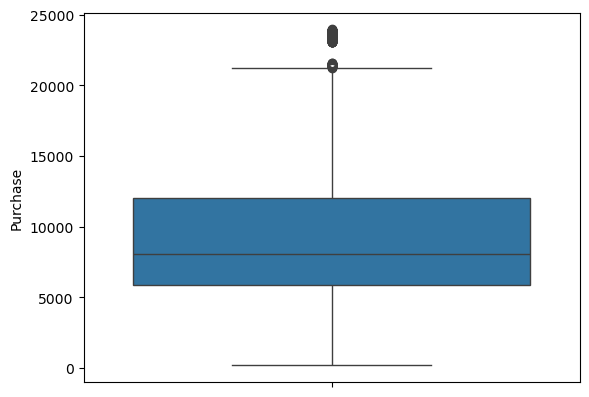

In [22]:
sns.boxplot(df['Purchase'])
plt.show()

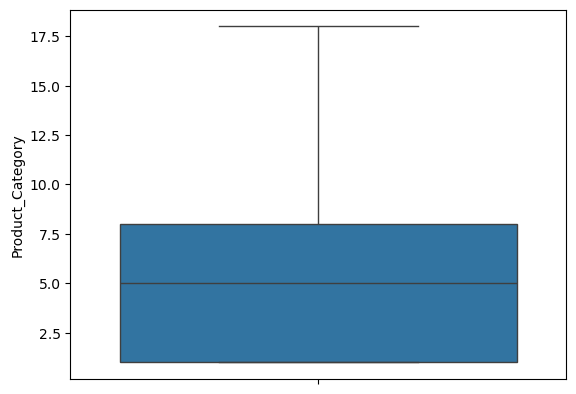

In [23]:
sns.boxplot(df['Product_Category'])
plt.show()

We can observer lots of outliers with respect to the Purchase(Amount)

## Univariate and Bivarite Analysis

### Univarite Analysis

In [24]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                    float64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                float64
Product_Category              float64
Purchase                      float64
dtype: object

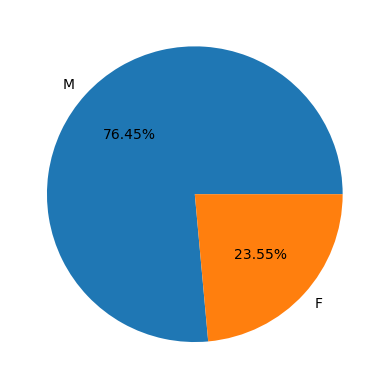

In [25]:
plt.pie(df['Gender'].value_counts() , labels=df['Gender'].value_counts().index , autopct= "%.2f%%")
plt.show()

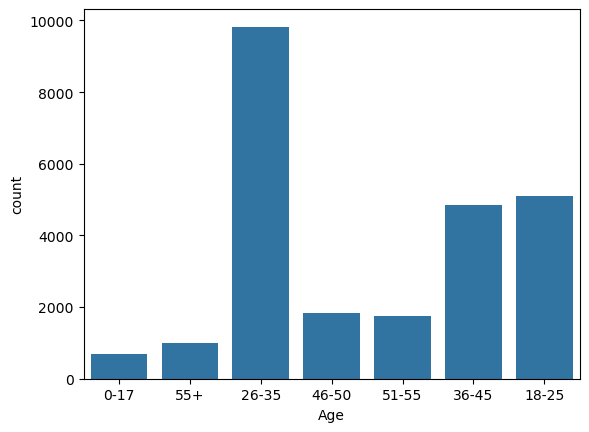

In [26]:
sns.countplot(x = df['Age'])
plt.show()

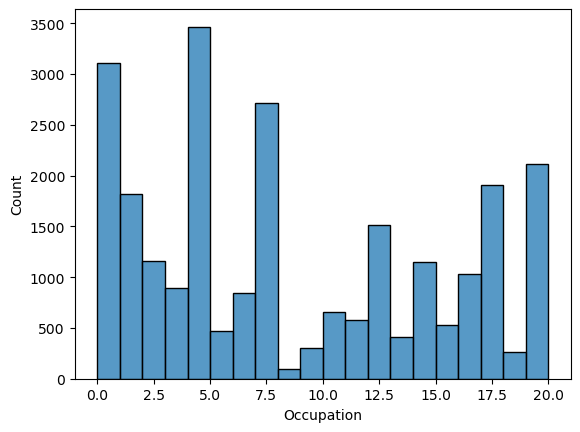

In [27]:
sns.histplot(df['Occupation'] , bins=20)
plt.show()

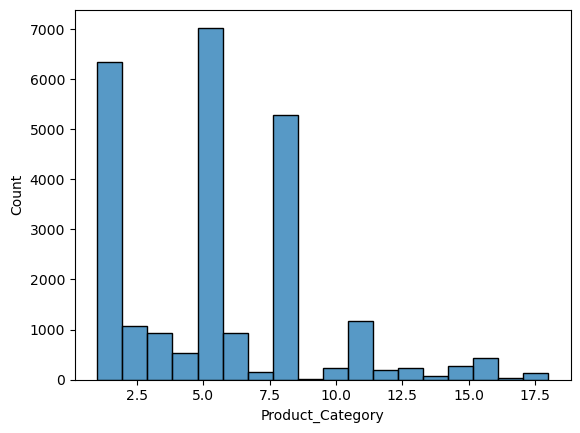

In [28]:
sns.histplot(df['Product_Category'], bins = 18)
plt.show()

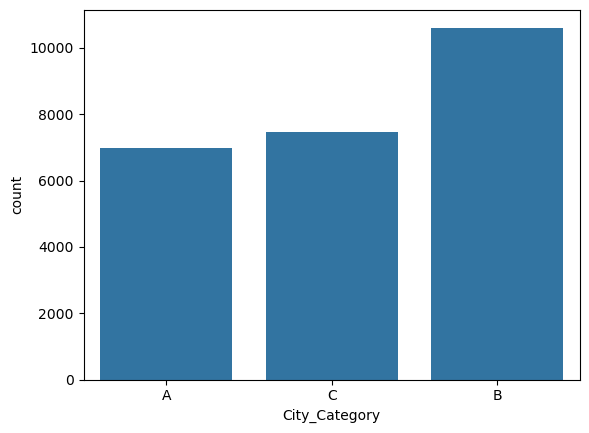

In [29]:
sns.countplot(x = df['City_Category'])
plt.show()

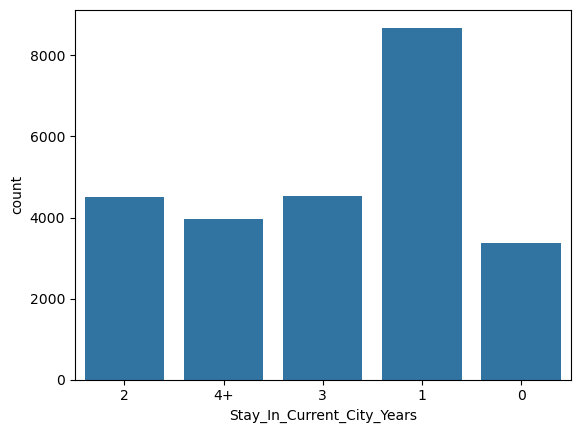

In [30]:
sns.countplot(x = df['Stay_In_Current_City_Years'])
plt.show()

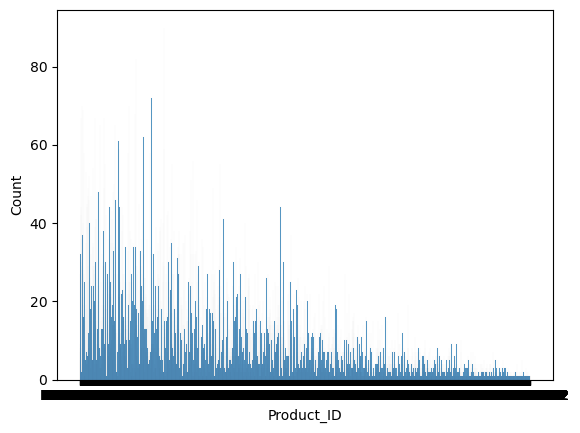

In [31]:
sns.histplot(df['Product_ID'] , bins=2820)
plt.show()

### Bivariate Analysis

In [32]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                    float64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                float64
Product_Category              float64
Purchase                      float64
dtype: object

In [33]:
df['Product_ID'].nunique()

2820

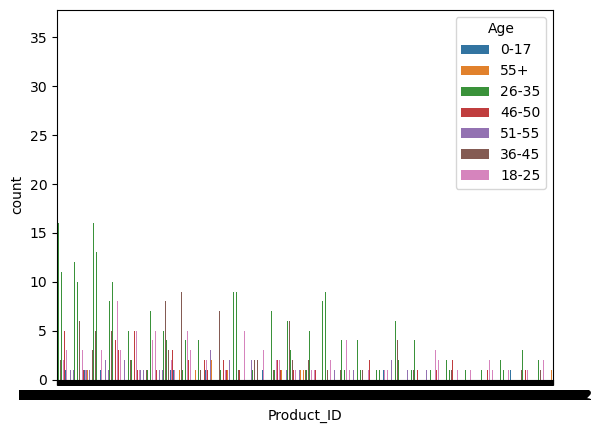

In [34]:
sns.countplot(x = df['Product_ID'] , hue = df['Age'] )
plt.show()

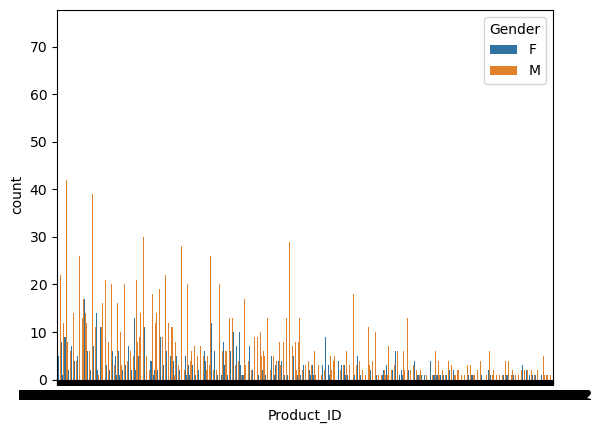

In [35]:
sns.countplot(x = df['Product_ID'] , hue = df['Gender'])
plt.show()

In [36]:
productCategory_age = df[['Product_Category','Age']]
productCategory_age.head()

,Product_Category,Age
0,3.0,0-17
1,1.0,0-17
2,12.0,0-17
3,12.0,0-17
4,8.0,55+


In [37]:
productCategory_age['Age'].value_counts()

Age
26-35    9826
18-25    5100
36-45    4839
46-50    1844
51-55    1738
55+       990
0-17      699
Name: count, dtype: int64

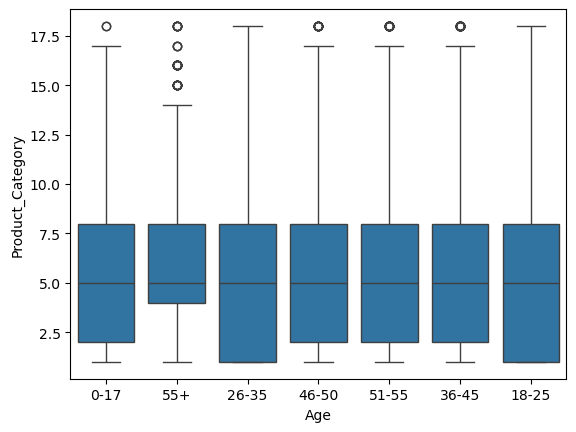

In [38]:
sns.boxplot(x=df['Age'],y=df['Product_Category'])
plt.show()

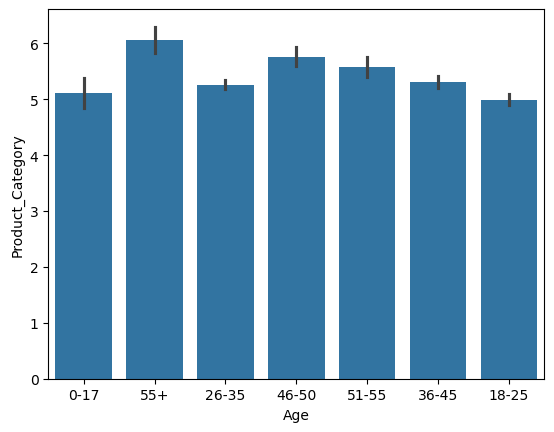

In [39]:
sns.barplot(x=df['Age'],y=df['Product_Category'])
plt.show()

In [40]:
productCategory_gender = df[['Product_Category','Gender']]
productCategory_gender

,Product_Category,Gender
0,3.0,F
1,1.0,F
2,12.0,F
3,12.0,F
4,8.0,M
...,...,...
25031,5.0,F
25032,4.0,F
25033,11.0,M
25034,11.0,M


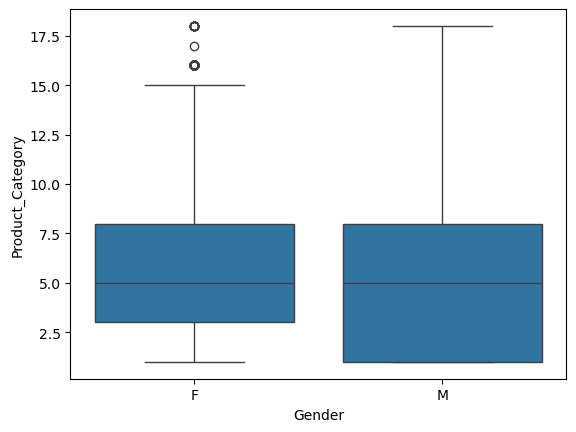

In [41]:
sns.boxplot(x = df['Gender'] , y = df['Product_Category'])
plt.show()

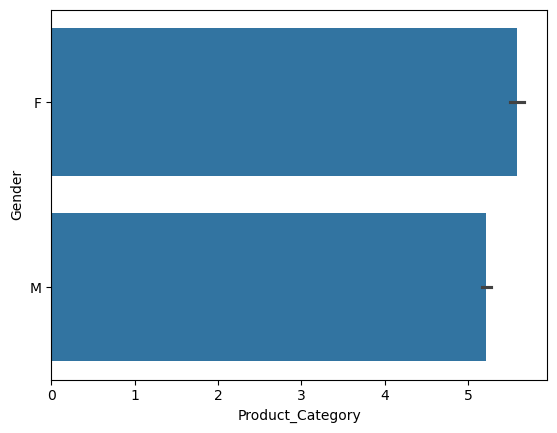

In [42]:
sns.barplot(x=df['Product_Category'],y=df['Gender'])
plt.show()

In [43]:
productCategory_city = df[['Product_Category','City_Category']]
productCategory_city

,Product_Category,City_Category
0,3.0,A
1,1.0,A
2,12.0,A
3,12.0,A
4,8.0,C
...,...,...
25031,5.0,B
25032,4.0,B
25033,11.0,C
25034,11.0,C


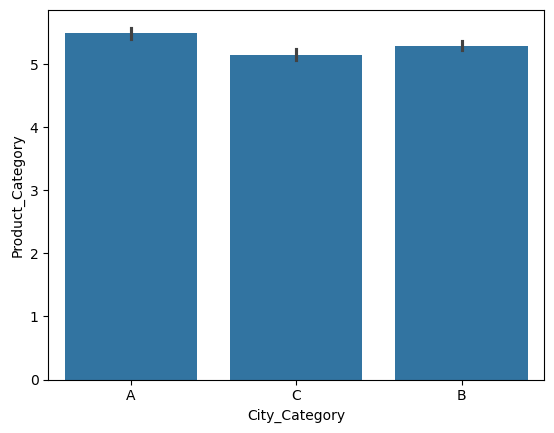

In [44]:
sns.barplot(x= productCategory_city['City_Category'] , y= productCategory_city['Product_Category'])
plt.show()

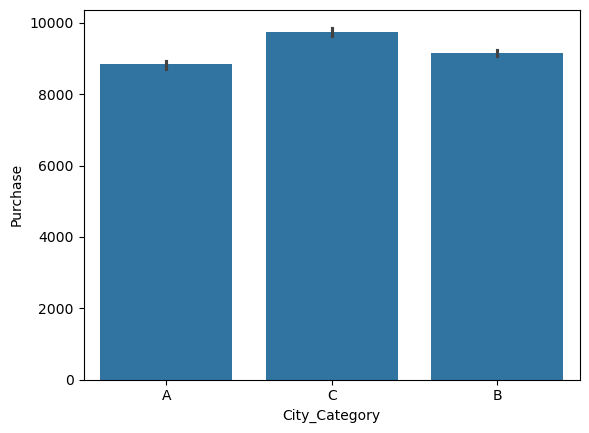

In [45]:
sns.barplot(x = df['City_Category'] , y =df['Purchase'])
plt.show()

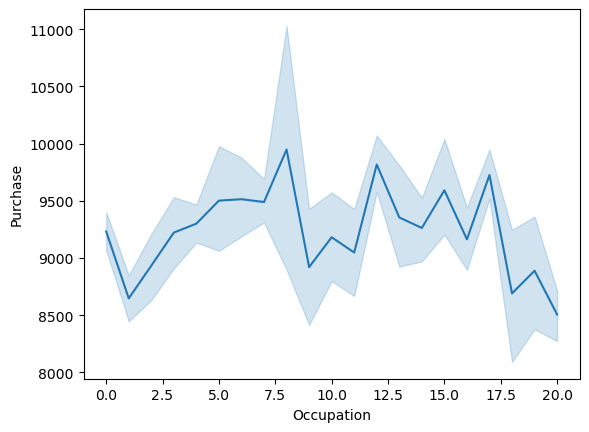

In [46]:
sns.lineplot(x= df['Occupation'] , y= df['Purchase'])
plt.show()

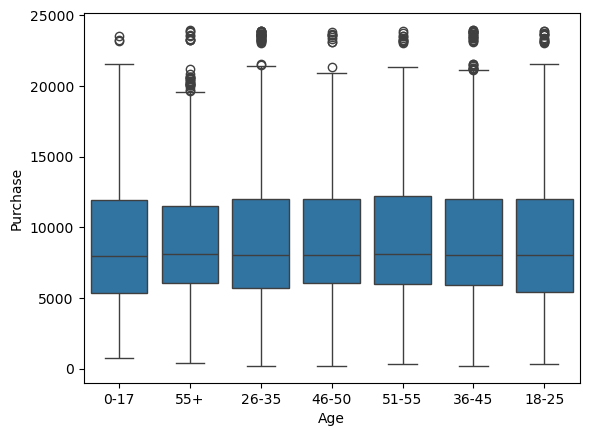

In [47]:
sns.boxplot(x=df['Age'],y=df['Purchase'])
plt.show()

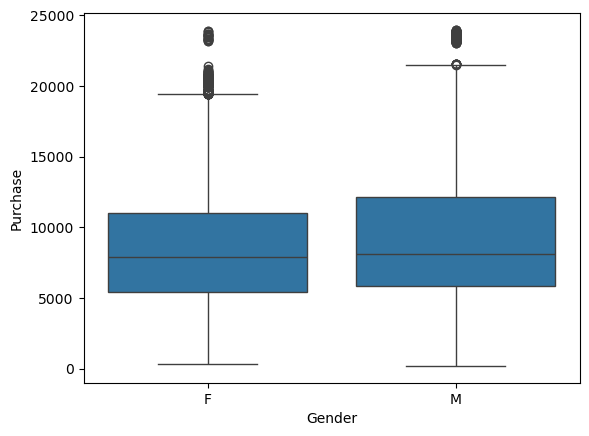

In [48]:
sns.boxplot(x=df['Gender'],y=df['Purchase'])
plt.show()

## Multi-Variate Analysis

In [49]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                    float64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                float64
Product_Category              float64
Purchase                      float64
dtype: object

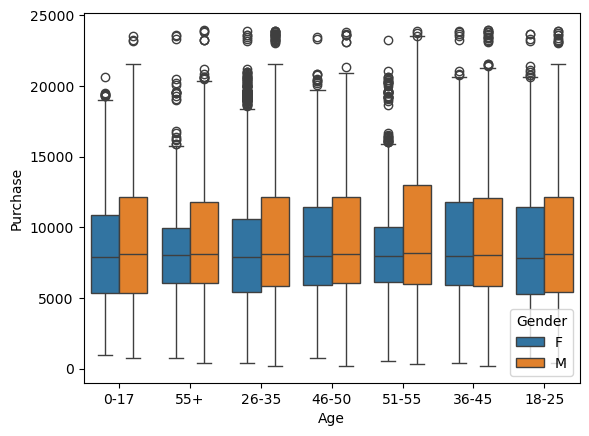

In [52]:
sns.boxplot(x=df['Age'],y=df['Purchase'],hue=df['Gender'])
plt.show()

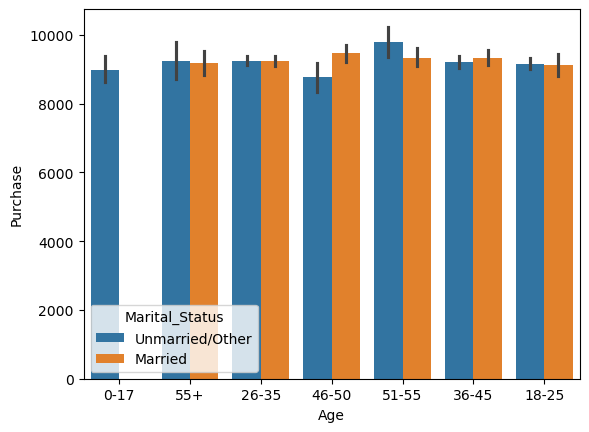

In [53]:
sns.barplot(x=df['Age'] , y=df['Purchase'] , hue=df['Marital_Status'].replace({1.0:"Married" , 0.0:"Unmarried/Other"}))
plt.show()

In [56]:
df['Product_Category'].value_counts().index

Index([ 5.0,  1.0,  8.0, 11.0,  2.0,  3.0,  6.0,  4.0, 16.0, 15.0, 13.0, 10.0,
       12.0,  7.0, 18.0, 14.0, 17.0,  9.0],
      dtype='float64', name='Product_Category')

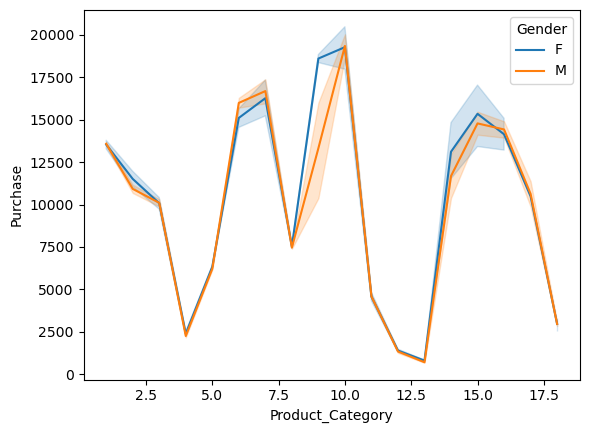

In [61]:
sns.lineplot(x=df['Product_Category'] , y=df['Purchase'] ,hue=df['Gender'])
plt.show()

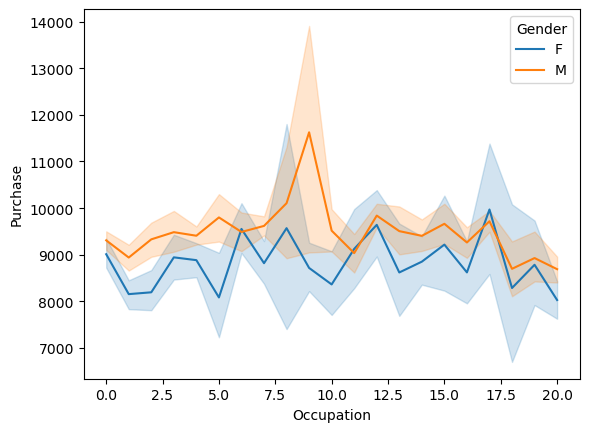

In [63]:
sns.lineplot(x=df['Occupation'] , y=df['Purchase'] ,hue=df['Gender'])
plt.show()

In [ ]:
sns.he